In [1]:
import tensorflow as tf
from datetime import datetime
# Restrict GPU memory consumption
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only allocate 1GB of memory on the first GPU
  try:
    tf.config.experimental.set_virtual_device_configuration(
        gpus[0],
        [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Virtual devices must be set before GPUs have been initialized
    print(e)

In [8]:
# Load in the MNIST data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
"X_train.shape: ", X_train.shape

11493376/11490434 [==============================] - 1s 0us/step


('X_train.shape: ', (60000, 28, 28))

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])



In [8]:
# Compile the model
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])


In [11]:
# Configure tensorboard
logdir = "U:/Coding/~Learning/Pd/logs/mnist/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.4766 - accuracy: 0.8623 - val_loss: 0.1417 - val_accuracy: 0.9574
Epoch 2/10
1875/1875 [==============================] - 2s 803us/step - loss: 0.1588 - accuracy: 0.9524 - val_loss: 0.1006 - val_accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 1s 773us/step - loss: 0.1087 - accuracy: 0.9674 - val_loss: 0.0904 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.0902 - accuracy: 0.9711 - val_loss: 0.0820 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0758 - accuracy: 0.9765 - val_loss: 0.0771 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 1s 721us/step - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0722 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 1s 705us/step - loss: 0.0575 - accuracy: 0.9819 - val_loss: 0.0709 -

In [12]:
# Evaluate the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 490us/step - loss: 0.0714 - accuracy: 0.9782


[0.0714198425412178, 0.9782000184059143]

Confusion matrix, without normalization
[[ 965    0    1    2    0    1    8    1    2    0]
 [   0 1125    4    0    0    0    2    0    4    0]
 [   2    2 1006    3    4    0    2    7    6    0]
 [   1    0    3  992    0    3    0    3    7    1]
 [   0    0    1    0  964    0    7    1    1    8]
 [   2    0    0   15    2  858    7    1    4    3]
 [   2    2    1    1    5    1  944    0    2    0]
 [   2    4    8    1    1    0    0 1005    1    6]
 [   3    0    1    6    2    3    2    4  950    3]
 [   1    2    0    6   14    2    0    8    3  973]]


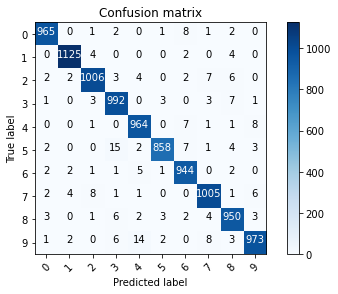

In [16]:
# Plot cunfusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

Text(0.5, 1.0, 'True label: 5 Predicted: 0')

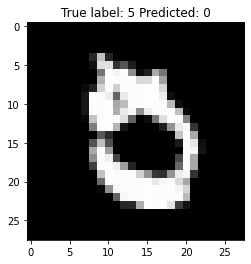

In [30]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title(f'True label: {y_test[i]} Predicted: {p_test[i]}')